In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing import image_dataset_from_directory

# **Problem 1** Divide and run the official tutorial model

Using the fashion MNIST

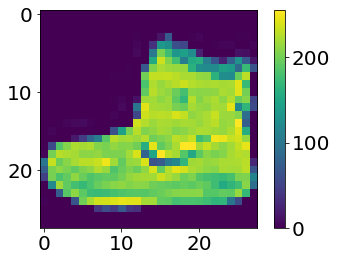

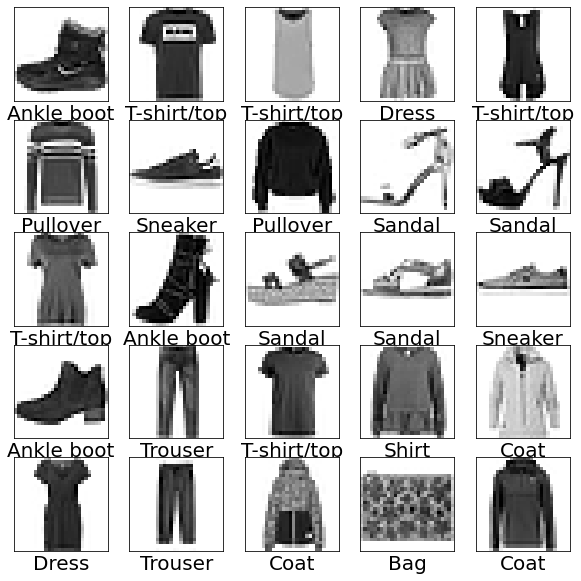

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5022 - accuracy: 0.8236
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3777 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3424 - accuracy: 0.8747
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3171 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2987 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2850 - accuracy: 0.8940
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2695 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2583 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2497 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

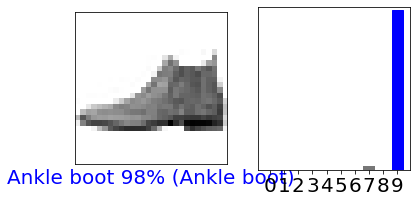

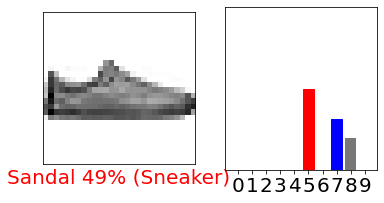

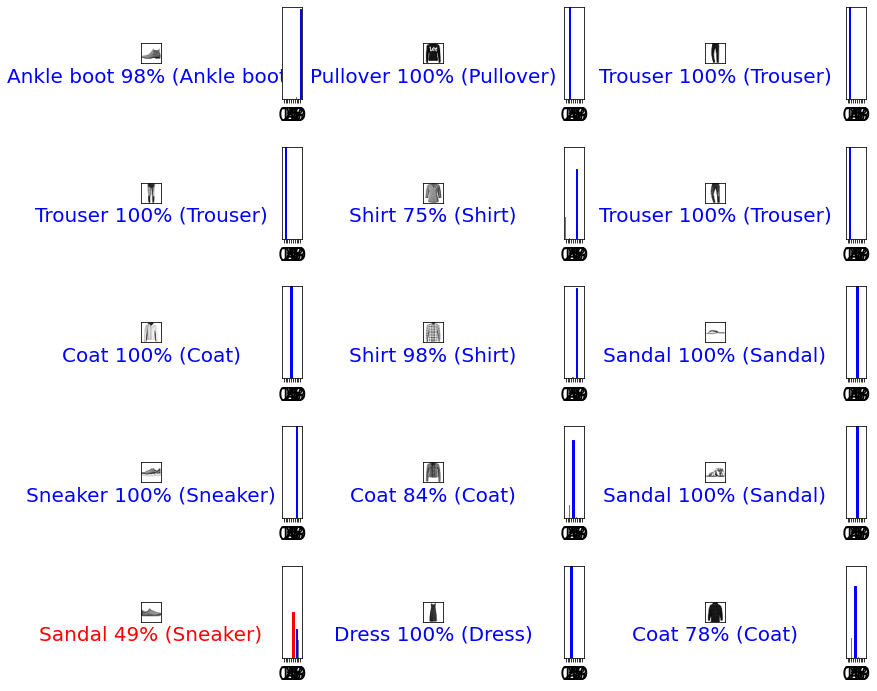

In [90]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)


test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# **Problem 3**: Learning Iris (binary classification) with Keras

In [85]:
"""
Binary classification of Iris dataset using neural network implemented in TensorFlow
"""
#Load dataset
df = pd.read_csv("Iris.csv")
#Condition extraction from data frame
df = df[(df["Species"] == "Iris-versicolor") | (df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
# NumPy 配列に変換
X = np.array(X)
y = np.array(y)
# Convert label to number
y[y == "Iris-versicolor"] = 0
y[y == "Iris-virginica"] = 1
y = y.astype(np.int64)[:, np.newaxis]
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X shape: (100, 4)
y shape: (100, 1)
X_train shape: (64, 4)
y_train shape: (64, 1)
X_val shape: (16, 4)
y_val shape: (16, 1)


In [17]:
# Build model
inputs_1 = tf.keras.Input(shape=(4))
x = tf.keras.layers.Dense(100, activation='relu')(inputs_1)
x = tf.keras.layers.Dense(100, activation='relu')(x)
outputs_1 = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model_1 = tf.keras.Model(inputs_1, outputs_1)

# Compile the model
model_1.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [21]:
# Train model
epochs = 10

history = model_1.fit(X_train, y_train, epochs=epochs, validation_split=0.2, batch_size=10, verbose=0)

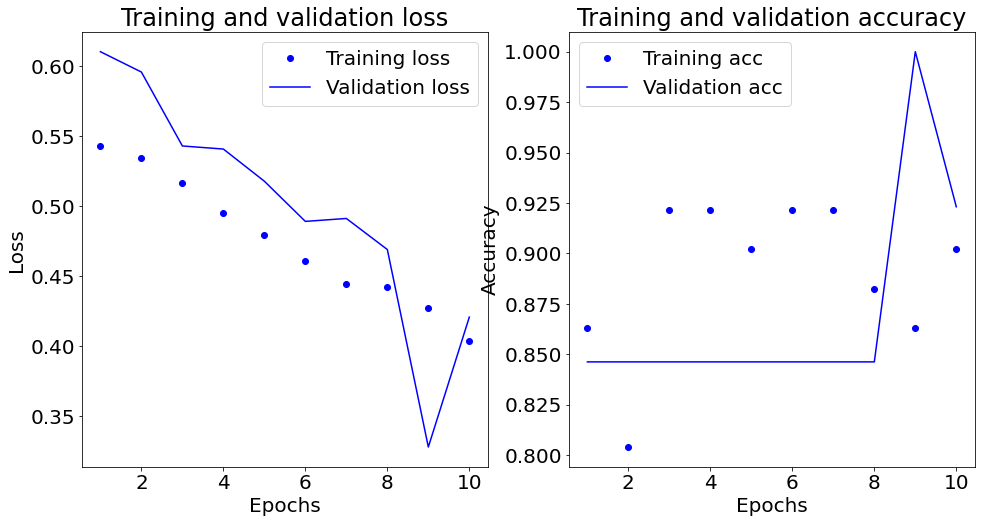

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.rcParams["font.size"] = 20
fig = plt.subplots(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [23]:
test_loss, test_acc = model_1.evaluate(X_test, y_test,verbose=1)

1/1 [==============================] - 0s 14ms/step - loss: 0.3955 - accuracy: 0.9500


# **Problem 4**: Learn Iris (multi-level classification) with Keras

In [35]:
# Training on 3 classes
#Load dataset
df = pd.read_csv("Iris.csv")

#Condition extraction from data frame
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

# NumPy 配列に変換
X = np.array(X)
y = np.array(y)

# Convert label to number
y[y == "Iris-versicolor"] = 0
y[y == "Iris-virginica"] = 1
y[y == "Iris-setosa"] = 2

# Convert label to one-hot vector
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y = enc.fit_transform(y[:, np.newaxis])

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X shape: (150, 4)
y shape: (150, 3)
X_train shape: (96, 4)
y_train shape: (96, 3)
X_val shape: (24, 4)
y_val shape: (24, 3)


In [36]:
# Build model
inputs_2 = tf.keras.Input(shape=(4))
x = tf.keras.layers.Dense(100, activation='relu')(inputs_2)
x = tf.keras.layers.Dense(100, activation='relu')(x)
outputs_2 = tf.keras.layers.Dense(3, activation='softmax')(x)

model_2 = tf.keras.Model(inputs_2, outputs_2)

# Compile the model
model_2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [37]:
# Train model
epochs = 20

history = model_2.fit(X_train, y_train, epochs=epochs, validation_data=[X_val, y_val], validation_split=0.2, batch_size=10, verbose=0)

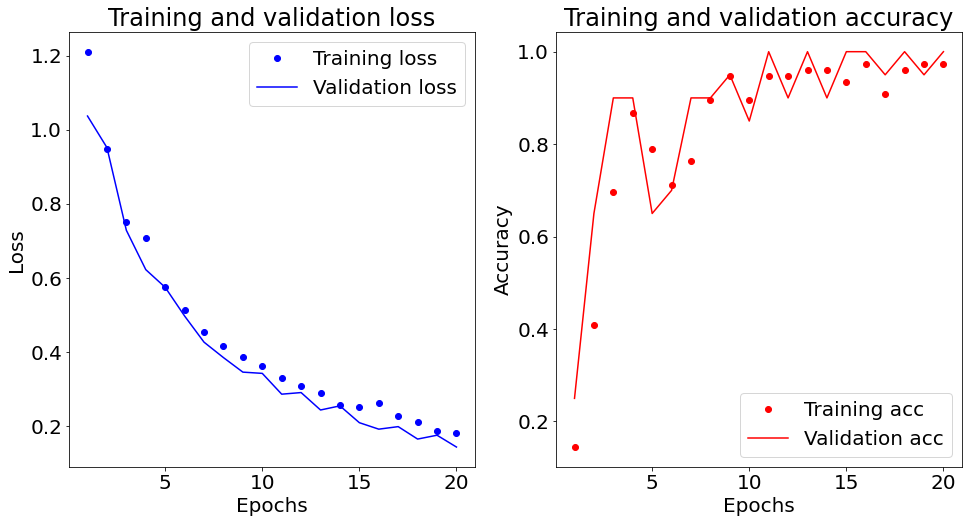

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.rcParams["font.size"] = 20
fig = plt.subplots(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'ro', label="Training acc")
plt.plot(epochs, val_acc, 'r', label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [41]:
test_loss, test_acc = model_2.evaluate(X_test, y_test,verbose=1)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 16ms/step - loss: 0.1671 - accuracy: 0.9667
Test accuracy: 0.9666666388511658


# **Problem 5**: Learning House Prices with Keras

---



In [44]:
# Load House Prices dataset
df_house = pd.read_csv('train.csv')

y = df_house[['SalePrice']]
X = df_house[['GrLivArea', 'YearBuilt']]
y = np.array(np.log1p(y))
X = np.array(np.log1p(X))

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X shape: (1460, 2)
y shape: (1460, 1)
X_train shape: (934, 2)
y_train shape: (934, 1)
X_val shape: (234, 2)
y_val shape: (234, 1)


In [49]:
# Build model
inputs_3 = tf.keras.Input(shape=(2))
x = tf.keras.layers.Dense(100, activation='relu')(inputs_3)
x = tf.keras.layers.Dense(100, activation='relu')(x)
outputs_3 = tf.keras.layers.Dense(1)(x)

model_3 = tf.keras.Model(inputs_3, outputs_3)

# Compile the model
model_3.compile(optimizer='adam',
                loss='mean_squared_error'
                )

In [50]:
# Train model
epochs = 20

history = model_3.fit(X_train, y_train, epochs=epochs, validation_data=[X_val, y_val], validation_split=0.2, batch_size=10, verbose=0)

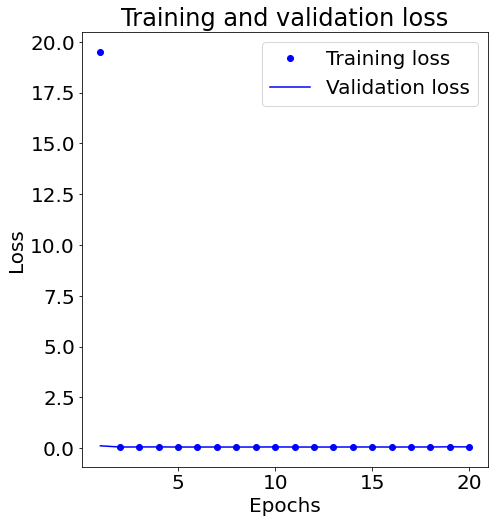

In [51]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.rcParams["font.size"] = 20
fig = plt.subplots(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = model_3.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MSE: {:.3f}'.format(mse))
print('RMSE: {:.3f}'.format(rmse))
print('R2 score: {:.3f}'.format(r2))

MSE: 0.082
RMSE: 0.286
R2 score: 0.459


# **Problem 6**:  Learning MNIST with Keras

In [86]:
from keras.datasets import mnist
(X, y), (X_test, y_test) = mnist.load_data()

In [87]:
# Type conversion, normalization
X = X.astype(np.float)
X_test = X_test.astype(np.float)
X /= 255
X_test /= 255

In [88]:
# Smoothing
X = X.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [89]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X shape: (60000, 28, 28, 1)
y shape: (60000,)
X_train shape: (48000, 28, 28, 1)
y_train shape: (48000,)
X_val shape: (12000, 28, 28, 1)
y_val shape: (12000,)


In [79]:
# Build model
inputs_4 = tf.keras.Input(shape=(28,28,1))
x = tf.keras.layers.Conv2D(32,(3,3), activation='relu', padding='SAME')(inputs_4)
x = tf.keras.layers.Conv2D(32,(3,3), activation='relu', padding='SAME')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='VALID')(x)
x = tf.keras.layers.Dropout(0.3)(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(100, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs_4 = tf.keras.layers.Dense(10,activation='softmax')(x)

model_4 = tf.keras.Model(inputs_4, outputs_4)

# Compile the model
model_4.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
                )

In [80]:
# Train model
epochs = 30

history = model_4.fit(X_train, y_train, epochs=epochs, validation_data=[X_val, y_val], validation_split=0.2, batch_size=100, verbose=1)

Epoch 1/30
384/384 [==============================] - 73s 190ms/step - loss: 0.2753 - accuracy: 0.9150 - val_loss: 0.0764 - val_accuracy: 0.9776
Epoch 2/30
384/384 [==============================] - 71s 185ms/step - loss: 0.0954 - accuracy: 0.9709 - val_loss: 0.0577 - val_accuracy: 0.9833
Epoch 3/30
384/384 [==============================] - 71s 184ms/step - loss: 0.0712 - accuracy: 0.9777 - val_loss: 0.0525 - val_accuracy: 0.9864
Epoch 4/30
384/384 [==============================] - 70s 183ms/step - loss: 0.0544 - accuracy: 0.9834 - val_loss: 0.0429 - val_accuracy: 0.9877
Epoch 5/30
384/384 [==============================] - 70s 183ms/step - loss: 0.0456 - accuracy: 0.9858 - val_loss: 0.0409 - val_accuracy: 0.9886
Epoch 6/30
384/384 [==============================] - 70s 183ms/step - loss: 0.0403 - accuracy: 0.9874 - val_loss: 0.0469 - val_accuracy: 0.9872
Epoch 7/30
384/384 [==============================] - 71s 184ms/step - loss: 0.0362 - accuracy: 0.9882 - val_loss: 0.0460 - val_ac

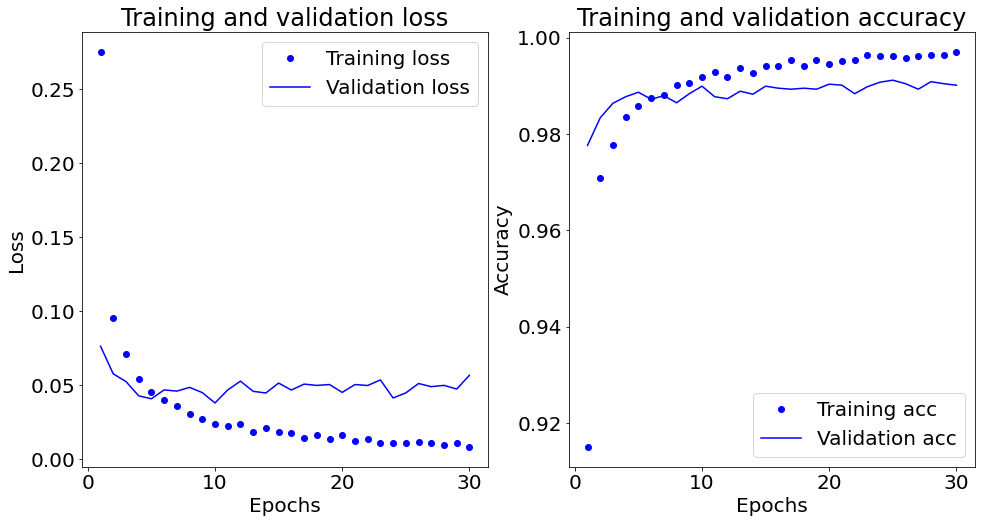

In [81]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.rcParams["font.size"] = 20
fig = plt.subplots(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [82]:
test_loss, test_acc = model_4.evaluate(X_test, y_test,verbose=1)
print('Test accuracy:', test_acc)

313/313 [==============================] - 5s 14ms/step - loss: 0.0455 - accuracy: 0.9901
Test accuracy: 0.9901000261306763
